In [170]:
import pandas as pd
df=pd.read_csv(r'C:\Users\explo\Documents\GitHub\Inceptez\Batch-6\15-K-Means\Assignment\CreditCard Dataset.csv')

In [171]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [172]:
df.shape

(8950, 18)

In [173]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [175]:
del df['CUST_ID']

In [176]:
print(df.shape[0])
df.isna().sum()

8950


BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [177]:
df.loc[df.MINIMUM_PAYMENTS.isna(),'MINIMUM_PAYMENTS']=0

In [178]:
df.loc[df.CREDIT_LIMIT.isna(),'CREDIT_LIMIT']=0

In [179]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.947277,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.922543,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [180]:
import numpy as np

def outliers_iqr(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [181]:
for x in df.columns:
    if df[x].dtypes!="object":
        ind,val=outliers_iqr(df[x])
        if ind!=[]:
            print(x,'-',len(ind))
            print(df[x].quantile(0.25),df[x].quantile(0.75))
            print(df[x].agg(['min','max','mean']))

BALANCE - 695
128.2819155 2054.1400355
min         0.000000
max     19043.138560
mean     1564.474828
Name: BALANCE, dtype: float64
BALANCE_FREQUENCY - 1493
0.8888889999999999 1.0
min     0.000000
max     1.000000
mean    0.877271
Name: BALANCE_FREQUENCY, dtype: float64
PURCHASES - 808
39.635 1110.13
min         0.000000
max     49039.570000
mean     1003.204834
Name: PURCHASES, dtype: float64
ONEOFF_PURCHASES - 1013
0.0 577.4050000000001
min         0.000000
max     40761.250000
mean      592.437371
Name: ONEOFF_PURCHASES, dtype: float64
INSTALLMENTS_PURCHASES - 867
0.0 468.63749999999993
min         0.000000
max     22500.000000
mean      411.067645
Name: INSTALLMENTS_PURCHASES, dtype: float64
CASH_ADVANCE - 1030
0.0 1113.8211392499998
min         0.000000
max     47137.211760
mean      978.871112
Name: CASH_ADVANCE, dtype: float64
ONEOFF_PURCHASES_FREQUENCY - 782
0.0 0.3
min     0.000000
max     1.000000
mean    0.202458
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64
CASH_ADVANCE_

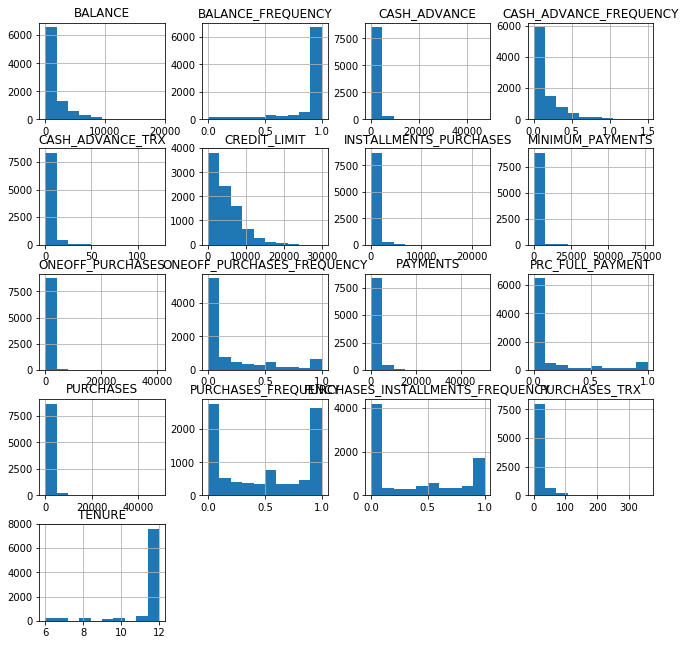

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=[11,11])
plt.show()

In [183]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df1 = pd.DataFrame(std.fit_transform(df),columns=df.columns)

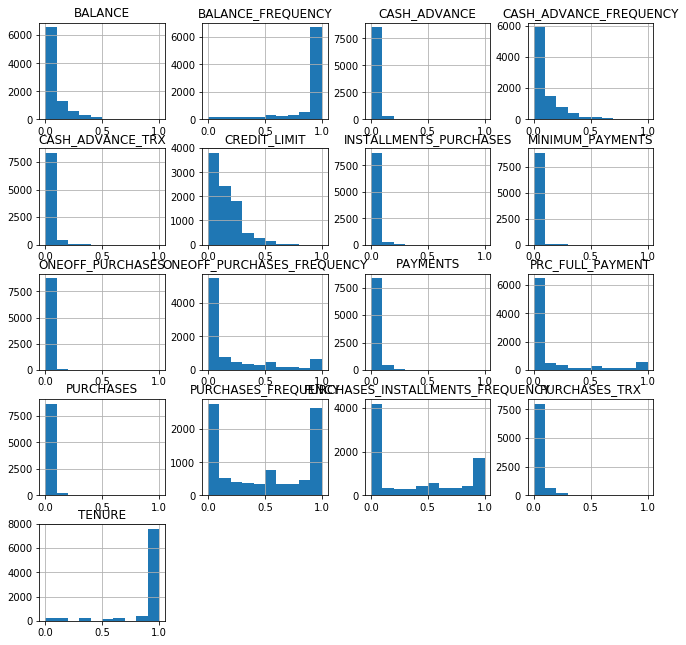

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline
df1[df1.dtypes[(df1.dtypes=="float64")|(df1.dtypes=="int64")].index.values].hist(figsize=[11,11])
plt.show()

In [185]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pylab as pl
%matplotlib inline

range(1, 20) [-5935.017925705251, -3507.768918877313, -2927.234738079402, -2551.2518427299433, -2262.3457541735947, -2052.2142914853466, -1857.566721328888, -1699.5905010653987, -1579.6773228714299, -1448.33927876888, -1349.6538432357668, -1282.5662138682005, -1225.3832315017462, -1168.8108543781464, -1144.823845137092, -1088.343134233838, -1058.6804610169165, -1037.3959304882578, -1014.8370150670095]


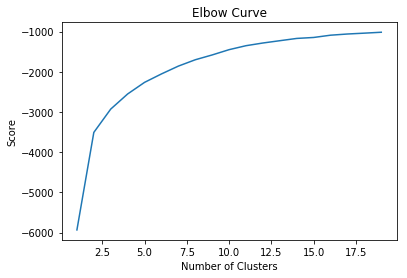

In [186]:
Nc = range(1, 20)
kmeans = [ KMeans(init = "k-means++",n_clusters=i, n_init = 12) for i in Nc]
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))]
print(Nc,score)
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [148]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(df1)
labels = k_means.labels_
df["Clus_km"] = labels
df.groupby(['Clus_km']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Clus_km,,,,,,,,,,,,,,,,,
0,1924.914811,0.973706,3197.352536,2393.314193,804.038344,658.917943,0.893007,0.798486,0.480963,0.093550,2.336798,42.324324,6699.097209,3231.043031,766.729665,0.270895,11.751906
1,1704.937983,0.826253,295.709807,232.917762,62.981154,1357.001215,0.143189,0.081525,0.060560,0.185808,4.421888,2.675487,4140.729864,1476.550375,810.046548,0.068335,11.446867
2,1139.155805,0.913869,1066.464398,268.939483,798.169285,502.912011,0.870860,0.098692,0.819835,0.070712,1.730507,20.819260,3950.134021,1392.029613,909.486564,0.237883,11.515271
